In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.rcParams['axes.titlesize'] = 25  
plt.rcParams['axes.labelsize'] = 23  
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlepad'] = 6 
plt.rcParams['axes.labelpad'] = 6 


pH = np.array([9, 9, 11, 11])
pOH = 14.94 - pH #for 0 deg C and 1 bar
OH = 10.0**(-pOH)
I = 0.1
T = 273

#Reductant concentration ranges:
Fe = np.logspace(-20,-3,100)
HS = np.logspace(-20,-3,100)

In [3]:
### Reaction 1: 4Fe(II) + O2 + 6H2O = 4FeOOH + 8H+###
log_k1 = 21.56 - (1545/T) - 3.29*np.sqrt(I) + 1.52*I #up to pH = 8.5
k1 = (10**log_k1)*(60*24*365)

### Reaction 2: HS + 2O2 = SO4 + H+ ###
log_k2 = 11.78 - ((3*10**3)/T) + 0.44*np.sqrt(I) #independent above pH = 8
k2 = (10**log_k2)*(24*365) #hours^-1

### Reaction 3: 2Fe(II) + H2O2 + 2H2O = 2FeOOH + 4H+ ###
log_k3 = 11.72 - 2.4*np.sqrt(I) + 1.38*I #up to pH 8
k3 = (10**log_k3)*(60*60*24*365) #s^-1

### Reaction 4: HS + 4H2O2 = SO4 + 4H2O + H+ ###
log_k4 = 8.60 - 2052/T + 0.084*np.sqrt(I) #I, pH = 8
#scale this for pH
log_k49 = 1.492/(1.66/log_k4)
log_k411 = 1.185/(1.66/log_k4)
log_k4 = np.array([log_k49, log_k49, log_k411, log_k411])
k4 = (10**log_k4) * (60*24*365) #min^-1

In [4]:
###Iron:

#Reaction 1: 4Fe(II) + O2 + 6H2O = 4FeOOH + 8H+###
#dO2/dt = 0.25*k1*[Fe][OH]^2 * [O2]
#t_O2 = 4/k1*[Fe]*[OH]^2
#Calculate t_O2 for each pH (seconds?)
N = len(Fe)
t1_O2 = np.zeros((len(pH), N))
#t_O2 in minutes/ 60 / 24 to days
for i in range (0,len(pH)):
    t1_O2[i] = (4.0/(k1 * Fe * OH[i]**2))

#Reaction 3: 2Fe + H2O2 + 2H2O = 2FeOOH + 4H+
#dH2O2/dt = 0.5*k3*[Fe]*[OH]*[H2O2]
#t_H2O2 = 2/k3*[Fe]*[OH]
t1_H2O2 = np.zeros((len(pH), N))
#t_O2 in minutes/ 60 / 24 to days
for i in range (0,len(pH)):
    t1_H2O2[i] = (2.0/(k3 * Fe * OH[i]))



In [5]:
###Sulfur:

#Reaction 2: HS + 2O2 = So4 + H+
#dO2/dt = 2*k2*[HS]*[O2]
#t_O2 = 1/2*k2*[HS]
N = len(HS)
t2_O2 = np.zeros((len(pH), N))
#t_O2 in minutes/ 60 / 24 to days
for i in range (0,len(pH)):
    t2_O2[i] = (1.0/(2*k2 * HS))


#Reaction 4: HS + 4H2O2 = SO4 + 4H2O + H+
#dH2O2/dt = 4*k4*[HS]*[H2O2]
#t_H2O2 = 1/4*k4*[HS]
t2_H2O2 = np.zeros((len(pH), N))
#t_O2 in minutes/ 60 / 24 to days
for i in range (0,len(pH)):
    t2_H2O2[i] = (1.0/(4*k4[i] * HS))

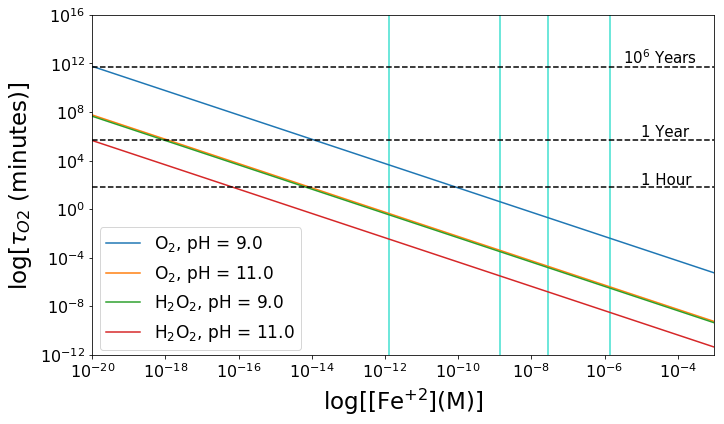

In [14]:
# y_low = np.zeros(6150 - 122)
# y_low[:] = -6
# y_high = np.zeros(6150 - 122)
# y_high[:] = 12

Fe2 = np.array([1.415*10**-6, 2.912*10**-8, 1.374*10**-9, 1.323*10**-12])

#Plot O2 consumption time as a function of iron concentration
fig1 = plt.figure(1)
fig1.set_figheight(7)
fig1.set_figwidth(12)
plt.subplots_adjust(left=0.1, bottom=None, right=0.82, top=0.8, wspace=None, hspace=None)
plt.clf()
#plt.grid()
plt.plot([Fe2[0],Fe2[0]], [1e-12, 1e16], 'turquoise')
plt.plot([Fe2[1],Fe2[1]], [1e-12, 1e16], 'turquoise')
plt.plot([Fe2[2],Fe2[2]], [1e-12, 1e16], 'turquoise')
plt.plot([Fe2[3],Fe2[3]], [1e-12, 1e16], 'turquoise')
plt.loglog(Fe, t1_O2[1], label = 'O$_2$, pH = 9.0')
plt.loglog(Fe, t1_O2[3], label = 'O$_2$, pH = 11.0')
plt.loglog(Fe, t1_H2O2[1], label = 'H$_2$O$_2$, pH = 9.0')
plt.loglog(Fe, t1_H2O2[3], label = 'H$_2$O$_2$, pH = 11.0')
#Plot horizontal lines for time labels
plt.loglog([1e-20, 1e-3], [60, 60], 'k--')
plt.text(1e-5, 1e2,'1 Hour', fontsize = 15 )
plt.plot([1e-20, 1e-3], [60*24*365, 60*24*365], 'k--')
plt.text(1e-5, 1e6,'1 Year', fontsize = 15 )
plt.plot([1e-20, 1e-3], [60*24*365*1e6, 60*24*365*1e6], 'k--')
plt.text(10**-5.5, 1e12,'$10^6$ Years', fontsize = 15 )
#plt.plot([Fe_low, Fe_low], [-12,11], ':', color = 'indigo')
#plt.plot([Fe_high, Fe_high], [-12,11], ':', color = 'indigo')
#plt.fill_between(Fe1[122:6150], y_low, y_high, color = 'lavender')
plt.xlabel('log[[Fe$^{+2}$](M)]')
plt.ylabel(r'log[$\tau_{O2}$ (minutes)]')
plt.xlim(1e-20, 1e-3)
plt.ylim(1e-12,1e16)
#plt.title(r'Time Required to Reduce Oxidant Concentration by $\frac{1}{e}$')
#plt.title(r'Fig. 6. Time Required to Reduce Oxidant Concentration by $\frac{1}{e}$') 
#plt.text(-11, 11.5, r'4Fe$^{2+}$ + O$_2$ + 6H$_2$O $\rightarrow$ 4FeOOH + 2H$^+$', fontsize = '24')

plt.legend(bbox_to_anchor=(0.35,0.4), prop={'size': 17})
plt.savefig('tauO2_iron_cons.png')


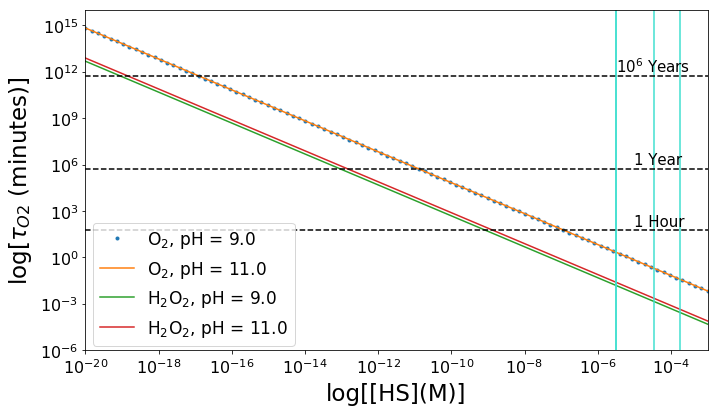

In [13]:
 
H2S = np.array([3.090*10**-6, 3.535*10**-5, 3.082*10**-6, 1.753*10**-4])


fig2 = plt.figure(2)
fig2.set_figheight(7)
fig2.set_figwidth(12)
plt.subplots_adjust(left=0.1, bottom=None, right=0.82, top=0.8, wspace=None, hspace=None)
plt.clf()
#plt.grid()
plt.loglog(HS, t2_O2[1], '.', label = 'O$_2$, pH = 9.0')
plt.loglog(HS, t2_O2[3], label = 'O$_2$, pH = 11.0')
plt.loglog(HS, t2_H2O2[1], label = 'H$_2$O$_2$, pH = 9.0')
plt.loglog(HS, t2_H2O2[3], label = 'H$_2$O$_2$, pH = 11.0')
#Plot vertical lines for concentrations used in paper:
plt.plot([H2S[0],H2S[0]], [1e-6, 1e16], 'turquoise')
plt.plot([H2S[1],H2S[1]], [1e-6, 1e16], 'turquoise')
plt.plot([H2S[2],H2S[2]], [1e-6, 1e16], 'turquoise')
plt.plot([H2S[3],H2S[3]], [1e-6, 1e16], 'turquoise')
#Plot horizontal lines for time labels
plt.loglog([1e-20, 1e-3], [60, 60], 'k--')
plt.text(1e-5, 1e2,'1 Hour', fontsize = 15 )
plt.plot([1e-20, 1e-3], [60*24*365, 60*24*365], 'k--')
plt.text(1e-5, 1e6,'1 Year', fontsize = 15 )
plt.plot([1e-20, 1e-3], [60*24*365*1e6, 60*24*365*1e6], 'k--')
plt.text(10**-5.5, 1e12,'$10^6$ Years', fontsize = 15 )
#plt.plot([Fe_low, Fe_low], [-12,11], ':', color = 'indigo')
#plt.plot([Fe_high, Fe_high], [-12,11], ':', color = 'indigo')
#plt.fill_between(Fe1[122:6150], y_low, y_high, color = 'lavender')
plt.xlabel('log[[HS](M)]')
plt.ylabel(r'log[$\tau_{O2}$ (minutes)]')
plt.xlim(1e-20, 1e-3)
plt.ylim(1e-6,1e16)
#plt.title(r'Time Required to Reduce Oxidant Concentration by $\frac{1}{e}$')
#plt.title(r'Fig. 6. Time Required to Reduce Oxidant Concentration by $\frac{1}{e}$') 
#plt.text(-11, 11.5, r'4Fe$^{2+}$ + O$_2$ + 6H$_2$O $\rightarrow$ 4FeOOH + 2H$^+$', fontsize = '24')

plt.legend(bbox_to_anchor=(0.35,0.4), prop={'size': 17})
plt.savefig('tauO2_iron_cons.png')





In [46]:
(1e4)/(60*24)

6.944444444444445

In [34]:
print(S_low)
print(HS_high)
H2S[8244]

[-4. -4. -4. ..., -4. -4. -4.]
-3.75621808391


-3.756000000004569